In [3]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings(action='ignore')
# import nltk
#nltk.download('all') # 처음 실행 시 주석을 제거하고 실행해주세요!

In [4]:
from tqdm import tqdm


In [5]:
df = pd.read_excel('news_label.xlsx', engine='openpyxl')

In [6]:
df['label'] = df['label'].astype(int) 
df

,dates,titles,contents,label,근거
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//,[\n마스카라까지 지우는 세정비누\n\n\n\n 피부에 자극을 주지 않고 각종 화장...,1,NaN
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",[\n기사내용 요약매장은 늘고 점포당 매출은 매월 줄고 있어코로나19로 마트 대신 ...,1,편의점과 제휴
2,2021.10.08,[株머니 매니저의 HOT종목]//,[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 주력 ...,1,성장언급
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//",[\n별도 물류센터 없이 동네마트 활용…中 알리바바의 슈퍼마켓 '허만셴셩' 벤치마크...,1,NaN
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",[\n\n\n\n\n/사진=알리익스프레스중국 최대 규모의 해외직구 쇼핑몰에서도 네이...,1,네이버 파이낸셜(네이버페이)와 제휴
...,...,...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//",[\n심사 승인 났는데 IPO 감감무소식골프존카운티는 내년으로 연기컬리도 오아시스 ...,0,NaN
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",[\n\t\t\t서울먹거리창업센터는 서울시가 국내 최초로 설립한 농식품 분야 특화 ...,1,NaN
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//",[\n■국감 오르는 유통업 새 먹거리e커머스 맞서 경쟁력 강화 위해쿠팡이츠마트 등 ...,0,NaN
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//,"[\n이커머스 IPO 대전, 흑자 기업 오아시스 연내 목표컬리, 증시 부진에 예상 ...",0,NaN


<AxesSubplot:>

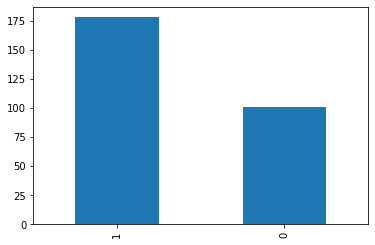

In [7]:
df['label'].value_counts().plot(kind='bar')

In [8]:
df['label'].value_counts()

1    178
0    101
Name: label, dtype: int64

In [9]:
df = df.rename(columns={'dates':'date', 'titles':'title','contents':'content'})
df['content'] = df['title'] + df['content']

In [10]:
df = df.drop(columns=['근거', 'title'])

In [11]:
train = df[:167]
# train['label'] = train['label'].astype(int)
train

,date,content,label
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,1
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",1
2,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//[\...",1
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",1
...,...,...,...
162,2022.04.22,"[NH투자증권, SK에코플랜트 주관사 선정… IPO 실적 호조]//[우리생협, 오아...",0
163,2022.04.25,[“500억 투자했는데”... 홍정국의 아픈 손가락 ‘헬로네이처’ 매각 적신호]//...,1
164,2022.04.26,"[오아시스마켓 ""오프라인 매장 간판서 '생협' 제외""]//[[고고IPO] ‘업계 4...",1
165,2022.04.27,[[마켓인]프롭테크하면 무조건 뜬다?…투자유치 '부익부 빈익빈']//[IPO 앞둔 ...,0


In [12]:
# test set
test = df[167:]
test

,date,content,label
167,2022.04.29,"[공정위, 새벽배송업체 오아시스 ‘생협 간판’ 사용에 제동]//[""무조건 창업 한번...",0
168,2022.04.30,[코로나 엔데믹 전환에 배송전쟁 판도 변화…점유율 경쟁 보다 ‘수익성’]//[\n롯...,1
169,2022.05.02,[창업자 188명 '지상 IR' 날개…K-스타트업 등용문 '우뚝']//[오아시스마켓...,1
170,2022.05.03,"[[엔데믹, 오다]이커머스 '옥석 가리기' 본격 시동]//[우여곡절 끝에 IPO 첫...",0
171,2022.05.04,[9조 원 규모 새벽배송 누가 살아남을까? 돈의 전쟁이 시작됐다!]//[\n\t\t...,0
...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//[\n심사 승인 났는...",0
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",1
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//[\n■국감 오르...",0
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//[\n이커머스 ...,0


### 학습/검증셋 분리

In [13]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train)
train.reset_index(inplace=True) # 전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화해주었습니다.
val.reset_index(inplace=True)

In [14]:
### train.set_index('date')

train = train.drop(columns = ['index'])
train

,date,content,label
0,2021.10.21,[오아시스부터 컬리까지…이커머스 업계 대세된 '렌털']//[‘난각번호 1번 계란 주...,1
1,2022.03.27,"[지어소프트, 대구에 이차전지 공장 설립]//[지어솔루션, 대구에 원통형 2차전지 ...",1
2,2021.12.02,[2022년 초대형 공모주 대거 출격 앞둬 LG엔솔·SSG닷컴 대기… ‘따상’ 신화...,1
3,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1
4,2021.11.02,[한쪽선 규제 한쪽선 투자...‘퀵커머스’ 놓고 온도차]//[[이커머스 대격변①] ...,1
...,...,...,...
120,2022.03.05,"[순천시, 최대 1만6천명 대대적인 일자리 창출 총력]//[\n미래산업·환경 등 4...",0
121,2021.11.30,"[[인사이드 스토리]대형마트, '당일 배송' 승부수 통할까]//[\n대형마트 잇따라...",1
122,2021.12.31,"[""내년 상장 온라인 식품 3사, 선별적인 투자 필요""]//[""올해도 IPO의 해""...",1
123,2022.02.08,"[""쓱닷컴·마켓컬리·오아시스, 올 IPO시장 풍향계""]//[오아시스마켓, 홈앤쇼핑서...",1


In [15]:
val

,index,date,content,label
0,140,2022.03.26,"[코로나 비대면 시대, 역발상 기업…오프라인 공략으로 경쟁력↑]//[\n온·오프라인...",1
1,73,2022.01.02,[2022년 ‘IPO 대어’ 몰려온다…LG에너지솔루션·현대엔지니어링·쓱닷컴 상장 ...,1
2,88,2022.01.20,[50만원짜리 호텔 꽃다발도 쓱…새벽배송 이어 선물하기도 떴다]//[LG엔솔 '청약...,0
3,118,2022.02.27,[국민 콜택시 ‘카카오T’ 내 차 대신 ‘쏘카’ 퀵커머스 ‘메쉬’ ‘바로고’ 전기·...,0
4,13,2021.10.26,"[[마켓인]국내 투자사, 가상자산 '주춤'에도 관련 기업 투자 속속]//[쿠팡맨 이...",1
5,30,2021.11.17,[내년 공모주 시장 벌써 들썩...IPO 최대어 LG엔솔 1월 상장]//[\n‘단군...,1
6,114,2022.02.17,"[""고팍스, 5번째 거래소 입성 환영… 나머지 21곳 실명계좌 발급돼야""]//[CJ...",1
7,55,2021.12.13,"[올해 IPO 시장 역대최대, 내년초에도 초대어 나온다]//[[시그널] 현대오일뱅크...",1
8,25,2021.11.08,[마켓컬리는 IPO를 할 수 있을까?[백주원의 리셀]]//[[마켓인]한배 탄 마켓컬...,1
9,106,2022.02.07,"[[삼정KPMG CFO Lounge] 이커머스의 키(Key) 체인저, 온라인 식품 ...",1


### 데이터 정제하기

In [16]:
# 문자 외의 것들 제거
train['content'] = train['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
train['content'] = train['content'].str.replace(' +',' ') 
train

,date,content,label
0,2021.10.21,오아시스부터 컬리까지 이커머스 업계 대세된 렌털 난각번호 1번 계란 주세요 비싸도...,1
1,2022.03.27,지어소프트 대구에 이차전지 공장 설립 지어솔루션 대구에 원통형 2차전지 소재공장 ...,1
2,2021.12.02,2022년 초대형 공모주 대거 출격 앞둬 LG엔솔 SSG닷컴 대기 따상 신화 이어...,1
3,2021.10.08,머니 매니저의 HOT종목 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 ...,1
4,2021.11.02,한쪽선 규제 한쪽선 투자 퀵커머스 놓고 온도차 이커머스 대격변 SSG닷컴 컬리 오...,1
...,...,...,...
120,2022.03.05,순천시 최대 1만6천명 대대적인 일자리 창출 총력 미래산업 환경 등 4대 분야 취...,0
121,2021.11.30,인사이드 스토리 대형마트 당일 배송 승부수 통할까 대형마트 잇따라 서비스 확대당일...,1
122,2021.12.31,내년 상장 온라인 식품 3사 선별적인 투자 필요 올해도 IPO의 해 70조원 LG...,1
123,2022.02.08,쓱닷컴 마켓컬리 오아시스 올 IPO시장 풍향계 오아시스마켓 홈앤쇼핑서 100억원 ...,1


<AxesSubplot:>

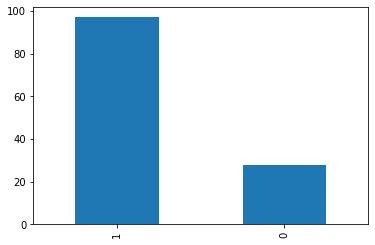

In [17]:
train['label'].value_counts().plot(kind='bar')

### 토큰화

In [18]:
from konlpy.tag import Okt

In [19]:
okt = Okt()

In [20]:
tokenized = [] # 데이터프레임의 한 컬럼으로 추가할 리스트
for sentence in train['content']: # 전처리된 리뷰들을 하나씩 꺼내옵니다
    tokens = okt.morphs(sentence, stem = True) # 형태소 분석 (stem = True로 설정해 어간 추출을 해주었습니다)
    tokenize = " ".join(tokens) # tokens라는 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    tokenized.append(tokenize) # 형태소 단위로 띄어쓰기된 문자열을 최종 리스트에 추가해줍니다
train["tokenized_stem"] = pd.DataFrame(tokenized) # 리스트를 데이터프레임으로 변환해 tokenized_stem라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem
0,2021.10.21,오아시스부터 컬리까지 이커머스 업계 대세된 렌털 난각번호 1번 계란 주세요 비싸도...,1,오아시스 부터 컬리 까지 이커머스 업계 대세 되다 렌털 난각 번호 1 번 계란 줄다...
1,2022.03.27,지어소프트 대구에 이차전지 공장 설립 지어솔루션 대구에 원통형 2차전지 소재공장 ...,1,지다 소프트 대구 에 이차전지 공장 설립 지다 솔루션 대구 에 원통 형 2 차다 소...
2,2021.12.02,2022년 초대형 공모주 대거 출격 앞둬 LG엔솔 SSG닷컴 대기 따상 신화 이어...,1,2022년 초대형 공 모주 대거 출격 앞두다 LG 엔솔 SSG 닷컴 대기 따다 상 ...
3,2021.10.08,머니 매니저의 HOT종목 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 ...,1,멀다 매니저 의 HOT 종목 씨 에스 윈드 는 풍력발전 기르다 구성 하다 타워 제작...
4,2021.11.02,한쪽선 규제 한쪽선 투자 퀵커머스 놓고 온도차 이커머스 대격변 SSG닷컴 컬리 오...,1,한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓다 온도 차 이커머스 대 격변 SSG 닷컴...


In [21]:
train['label'] = train['label'].astype(int)
train

,date,content,label,tokenized_stem
0,2021.10.21,오아시스부터 컬리까지 이커머스 업계 대세된 렌털 난각번호 1번 계란 주세요 비싸도...,1,오아시스 부터 컬리 까지 이커머스 업계 대세 되다 렌털 난각 번호 1 번 계란 줄다...
1,2022.03.27,지어소프트 대구에 이차전지 공장 설립 지어솔루션 대구에 원통형 2차전지 소재공장 ...,1,지다 소프트 대구 에 이차전지 공장 설립 지다 솔루션 대구 에 원통 형 2 차다 소...
2,2021.12.02,2022년 초대형 공모주 대거 출격 앞둬 LG엔솔 SSG닷컴 대기 따상 신화 이어...,1,2022년 초대형 공 모주 대거 출격 앞두다 LG 엔솔 SSG 닷컴 대기 따다 상 ...
3,2021.10.08,머니 매니저의 HOT종목 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 ...,1,멀다 매니저 의 HOT 종목 씨 에스 윈드 는 풍력발전 기르다 구성 하다 타워 제작...
4,2021.11.02,한쪽선 규제 한쪽선 투자 퀵커머스 놓고 온도차 이커머스 대격변 SSG닷컴 컬리 오...,1,한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓다 온도 차 이커머스 대 격변 SSG 닷컴...
...,...,...,...,...
120,2022.03.05,순천시 최대 1만6천명 대대적인 일자리 창출 총력 미래산업 환경 등 4대 분야 취...,0,순천시 최대 1만 6천 명 대 대적 인 일자리 창 추다 총력 미래 산업 환경 등 4...
121,2021.11.30,인사이드 스토리 대형마트 당일 배송 승부수 통할까 대형마트 잇따라 서비스 확대당일...,1,인사 이드 스토리 대형 마트 당일 배송 승부 수 통 하다 대형 마트 잇따르다 서비스...
122,2021.12.31,내년 상장 온라인 식품 3사 선별적인 투자 필요 올해도 IPO의 해 70조원 LG...,1,내년 상장 온라인 식품 3 사 선 별 적 인 투자 필요 올해 도 IPO 의 해 70...
123,2022.02.08,쓱닷컴 마켓컬리 오아시스 올 IPO시장 풍향계 오아시스마켓 홈앤쇼핑서 100억원 ...,1,쓱 닷컴 마켓 컬리 오아시스 오다 IPO 시장 풍향계 오아시스 마켓 홈앤쇼핑 서 1...


### 품사 태깅 / 불용어 처리와 비슷한 느낌

In [22]:
main_pos = [] # 데이터프레임의 새 컬럼이 될 리스트
for sentence in train['content']: # 리뷰들을 하나씩 가져옵니다
    pos = okt.pos(sentence) # 형태소 분석을 진행하고 해당 리스트를 pos라는 변수로 받습니다
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")] # 가져오고자 하는 품사에 해당하면 해당 형태소를 main_words 리스트에 추가합니다.
    main_words_str = " ".join(main_words) # main_words 리스트 안의 형태소들을 띄어쓰기로 분리된 하나의 문자열로 join시켜줍니다.
    main_pos.append(main_words_str) # 선택한 형태소들로 이루어진 문자열을 최종 리스트에 추가해줍니다
train["main_pos"] = pd.DataFrame(main_pos) # 리스트를 데이터프레임으로 변환해 main_pos라는 컬럼명으로 추가해줍니다.

train.head() # 데이터 확인

,date,content,label,tokenized_stem,main_pos
0,2021.10.21,오아시스부터 컬리까지 이커머스 업계 대세된 렌털 난각번호 1번 계란 주세요 비싸도...,1,오아시스 부터 컬리 까지 이커머스 업계 대세 되다 렌털 난각 번호 1 번 계란 줄다...,오아시스 컬리 이커머스 업계 대세 된 렌털 난각 번호 번 계란 주세요 비싸도 가치 ...
1,2022.03.27,지어소프트 대구에 이차전지 공장 설립 지어솔루션 대구에 원통형 2차전지 소재공장 ...,1,지다 소프트 대구 에 이차전지 공장 설립 지다 솔루션 대구 에 원통 형 2 차다 소...,지어 소프트 대구 이차전지 공장 설립 지어 솔루션 대구 원통 차전지 소재 공장 건립...
2,2021.12.02,2022년 초대형 공모주 대거 출격 앞둬 LG엔솔 SSG닷컴 대기 따상 신화 이어...,1,2022년 초대형 공 모주 대거 출격 앞두다 LG 엔솔 SSG 닷컴 대기 따다 상 ...,초대형 모주 대거 출격 앞둬 엔솔 대기 따 상 신화 이어질까 오아시스 마켓 성남시 ...
3,2021.10.08,머니 매니저의 HOT종목 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 ...,1,멀다 매니저 의 HOT 종목 씨 에스 윈드 는 풍력발전 기르다 구성 하다 타워 제작...,머니 매니저 종목 씨 에스 윈드 풍력발전 기를 구성 하는 타워 제작 및 설치 주력 ...
4,2021.11.02,한쪽선 규제 한쪽선 투자 퀵커머스 놓고 온도차 이커머스 대격변 SSG닷컴 컬리 오...,1,한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓다 온도 차 이커머스 대 격변 SSG 닷컴...,한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓고 온도 차 이커머스 격변 컬리 오아시스 ...


In [23]:
train

,date,content,label,tokenized_stem,main_pos
0,2021.10.21,오아시스부터 컬리까지 이커머스 업계 대세된 렌털 난각번호 1번 계란 주세요 비싸도...,1,오아시스 부터 컬리 까지 이커머스 업계 대세 되다 렌털 난각 번호 1 번 계란 줄다...,오아시스 컬리 이커머스 업계 대세 된 렌털 난각 번호 번 계란 주세요 비싸도 가치 ...
1,2022.03.27,지어소프트 대구에 이차전지 공장 설립 지어솔루션 대구에 원통형 2차전지 소재공장 ...,1,지다 소프트 대구 에 이차전지 공장 설립 지다 솔루션 대구 에 원통 형 2 차다 소...,지어 소프트 대구 이차전지 공장 설립 지어 솔루션 대구 원통 차전지 소재 공장 건립...
2,2021.12.02,2022년 초대형 공모주 대거 출격 앞둬 LG엔솔 SSG닷컴 대기 따상 신화 이어...,1,2022년 초대형 공 모주 대거 출격 앞두다 LG 엔솔 SSG 닷컴 대기 따다 상 ...,초대형 모주 대거 출격 앞둬 엔솔 대기 따 상 신화 이어질까 오아시스 마켓 성남시 ...
3,2021.10.08,머니 매니저의 HOT종목 씨에스윈드는 풍력발전기를 구성하는 타워 제작 및 설치를 ...,1,멀다 매니저 의 HOT 종목 씨 에스 윈드 는 풍력발전 기르다 구성 하다 타워 제작...,머니 매니저 종목 씨 에스 윈드 풍력발전 기를 구성 하는 타워 제작 및 설치 주력 ...
4,2021.11.02,한쪽선 규제 한쪽선 투자 퀵커머스 놓고 온도차 이커머스 대격변 SSG닷컴 컬리 오...,1,한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓다 온도 차 이커머스 대 격변 SSG 닷컴...,한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓고 온도 차 이커머스 격변 컬리 오아시스 ...
...,...,...,...,...,...
120,2022.03.05,순천시 최대 1만6천명 대대적인 일자리 창출 총력 미래산업 환경 등 4대 분야 취...,0,순천시 최대 1만 6천 명 대 대적 인 일자리 창 추다 총력 미래 산업 환경 등 4...,순천시 최대 대적 일자리 창 출 총력 미래 산업 환경 등 대 분야 취업 증가 등 고...
121,2021.11.30,인사이드 스토리 대형마트 당일 배송 승부수 통할까 대형마트 잇따라 서비스 확대당일...,1,인사 이드 스토리 대형 마트 당일 배송 승부 수 통 하다 대형 마트 잇따르다 서비스...,인사 이드 스토리 대형 마트 당일 배송 승부 수 통 할까 대형 마트 잇따라 서비스 ...
122,2021.12.31,내년 상장 온라인 식품 3사 선별적인 투자 필요 올해도 IPO의 해 70조원 LG...,1,내년 상장 온라인 식품 3 사 선 별 적 인 투자 필요 올해 도 IPO 의 해 70...,내년 상장 온라인 식품 사 선 적 투자 필요 올해 의 해 엔솔 연초 출격 온라인 매...
123,2022.02.08,쓱닷컴 마켓컬리 오아시스 올 IPO시장 풍향계 오아시스마켓 홈앤쇼핑서 100억원 ...,1,쓱 닷컴 마켓 컬리 오아시스 오다 IPO 시장 풍향계 오아시스 마켓 홈앤쇼핑 서 1...,쓱 마켓 컬리 오아시스 올 시장 풍향계 오아시스 마켓 홈앤쇼핑 투자 유치 성공 이제...


### 벡터화

In [24]:
X_train = train.main_pos # training 데이터에서 문서 추출
y_train = train.label # training 데이터에서 라벨 추출

In [25]:
X_train

0      오아시스 컬리 이커머스 업계 대세 된 렌털 난각 번호 번 계란 주세요 비싸도 가치 ...
1      지어 소프트 대구 이차전지 공장 설립 지어 솔루션 대구 원통 차전지 소재 공장 건립...
2      초대형 모주 대거 출격 앞둬 엔솔 대기 따 상 신화 이어질까 오아시스 마켓 성남시 ...
3      머니 매니저 종목 씨 에스 윈드 풍력발전 기를 구성 하는 타워 제작 및 설치 주력 ...
4      한쪽 선 규제 한쪽 선 투자 퀵 커머스 놓고 온도 차 이커머스 격변 컬리 오아시스 ...
                             ...                        
120    순천시 최대 대적 일자리 창 출 총력 미래 산업 환경 등 대 분야 취업 증가 등 고...
121    인사 이드 스토리 대형 마트 당일 배송 승부 수 통 할까 대형 마트 잇따라 서비스 ...
122    내년 상장 온라인 식품 사 선 적 투자 필요 올해 의 해 엔솔 연초 출격 온라인 매...
123    쓱 마켓 컬리 오아시스 올 시장 풍향계 오아시스 마켓 홈앤쇼핑 투자 유치 성공 이제...
124    코 주부 주식 수익률 기자 이렇게 망했다 편 박스 갇힌 쿠팡 경쟁 심화 우려 커지는...
Name: main_pos, Length: 125, dtype: object

In [26]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
120    0
121    1
122    1
123    1
124    1
Name: label, Length: 125, dtype: int32

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # countvectorizer 생성
vectorizer.fit(X_train) # countvectorizer 학습
X_train_vec = vectorizer.transform(X_train) # transform

In [28]:
a = vectorizer.vocabulary_

In [29]:
type(a)

dict

In [30]:
a

{'오아시스': 9190,
 '컬리': 12693,
 '이커머스': 10175,
 '업계': 8720,
 '대세': 3023,
 '렌털': 4058,
 '난각': 1995,
 '번호': 5571,
 '계란': 753,
 '주세요': 11493,
 '비싸도': 6291,
 '가치': 177,
 '소비': 7219,
 '언박싱': 8676,
 '마켓': 4258,
 '업체': 8734,
 '사업': 6536,
 '진출': 11900,
 '속도': 7269,
 '높이': 2507,
 '있다': 10523,
 '이민주': 10029,
 '기자': 1503,
 '지난해': 11739,
 '구독': 1085,
 '경제': 734,
 '시장': 7723,
 '넘어서': 2298,
 '성장': 7075,
 '동력': 3324,
 '낙점': 1992,
 '관련': 1003,
 '분야': 6049,
 '영역': 9083,
 '넓히기에': 2261,
 '따르면': 3774,
 '새벽': 6792,
 '배송': 5474,
 '최근': 12336,
 '서비스': 6907,
 '시작': 7722,
 '이어': 10075,
 '쿠팡': 12784,
 '목적': 4828,
 '렌털업': 4060,
 '추가': 12365,
 '했다': 14160,
 '취급': 12477,
 '하는': 13751,
 '상품': 6772,
 '음식물': 9838,
 '처리기': 12167,
 '안마': 8266,
 '기계': 1417,
 '주방': 11487,
 '가전': 138,
 '생활': 6862,
 '공기청정기': 912,
 '제습기': 11263,
 '정수기': 11179,
 '개다': 422,
 '향후': 14213,
 '매트리스': 4561,
 '트레이닝': 13124,
 '제품': 11303,
 '품목': 13547,
 '확대': 14447,
 '예정': 9127,
 '밝혔다': 5394,
 '여기': 8871,
 '비대': 6253,
 '문화': 4973,
 '맞춰': 4494,
 '가정': 

In [31]:
X_train_vec.toarray()

array([[0, 0, 3, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [5, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
y_train = y_train.astype('int')

### 모델 학습

In [33]:
from sklearn.linear_model import LogisticRegression # 모델 불러오기

model = LogisticRegression() # 객체에 모델 할당

model.fit(X_train_vec, y_train) # 모델 학습

LogisticRegression()

In [34]:
# val = val.drop(columns=['index'])
val

,index,date,content,label
0,140,2022.03.26,"[코로나 비대면 시대, 역발상 기업…오프라인 공략으로 경쟁력↑]//[\n온·오프라인...",1
1,73,2022.01.02,[2022년 ‘IPO 대어’ 몰려온다…LG에너지솔루션·현대엔지니어링·쓱닷컴 상장 ...,1
2,88,2022.01.20,[50만원짜리 호텔 꽃다발도 쓱…새벽배송 이어 선물하기도 떴다]//[LG엔솔 '청약...,0
3,118,2022.02.27,[국민 콜택시 ‘카카오T’ 내 차 대신 ‘쏘카’ 퀵커머스 ‘메쉬’ ‘바로고’ 전기·...,0
4,13,2021.10.26,"[[마켓인]국내 투자사, 가상자산 '주춤'에도 관련 기업 투자 속속]//[쿠팡맨 이...",1
5,30,2021.11.17,[내년 공모주 시장 벌써 들썩...IPO 최대어 LG엔솔 1월 상장]//[\n‘단군...,1
6,114,2022.02.17,"[""고팍스, 5번째 거래소 입성 환영… 나머지 21곳 실명계좌 발급돼야""]//[CJ...",1
7,55,2021.12.13,"[올해 IPO 시장 역대최대, 내년초에도 초대어 나온다]//[[시그널] 현대오일뱅크...",1
8,25,2021.11.08,[마켓컬리는 IPO를 할 수 있을까?[백주원의 리셀]]//[[마켓인]한배 탄 마켓컬...,1
9,106,2022.02.07,"[[삼정KPMG CFO Lounge] 이커머스의 키(Key) 체인저, 온라인 식품 ...",1


### 검증셋으로 모델 성능 검증

In [35]:
# preprocessed
# 문자 외의 것들 제거
val['content'] = val['content'].str.replace('[^가-힣a-zA-Z0-9_]',' ')
# 혹시 모를 다중 공백 제거
val['content'] = val['content'].str.replace(' +',' ') 

# tokenized_stem
tokenized = []
for sentence in val['content']:
    tokens = okt.morphs(sentence, stem = True) # stem = True로 설정해 어간 추출을 해주었습니다
    tokenize = " ".join(tokens)
    tokenized.append(tokenize)
val["tokenized_stem"] = pd.DataFrame(tokenized)

# main_pos
main_pos = []
for sentence in val['content']:
    pos = okt.pos(sentence)
    main_words = [word_pos[0] for word_pos in pos if word_pos[1] in ("Noun", "Adverb", "Adjective", "Verb")]
    main_words_str = " ".join(main_words)
    main_pos.append(main_words_str)
val["main_pos"] = pd.DataFrame(main_pos)

val.head()

,index,date,content,label,tokenized_stem,main_pos
0,140,2022.03.26,코로나 비대면 시대 역발상 기업 오프라인 공략으로 경쟁력 온 오프라인 시너지 강화...,1,코로나 비대 면 시대 역 발상 기업 오프라인 공략 으로 경쟁력 온 오프라인 시너지 ...,코로나 비대 시대 역 발상 기업 오프라인 공략 경쟁력 온 오프라인 시너지 강화 유통...
1,73,2022.01.02,2022년 IPO 대어 몰려온다 LG에너지솔루션 현대엔지니어링 쓱닷컴 상장 예고 ...,1,2022년 IPO 대다 몰려오다 LG 에너지 솔루션 현대 엔지니어링 쓱 닷컴 상장 ...,대어 몰려온다 에너지 솔루션 현대 엔지니어링 쓱 상장 예고 올해 시장 뜨거울 듯 엔...
2,88,2022.01.20,50만원짜리 호텔 꽃다발도 쓱 새벽배송 이어 선물하기도 떴다 LG엔솔 청약 전쟁 ...,0,50만원 짜리 호텔 꽃다발 도 쓱 새벽 배송 이다 선물 하다 뜨다 LG 엔솔 청약 ...,호텔 꽃다발 쓱 새벽 배송 이어 선물 하기도 떴다 엔솔 청약 전쟁 대규모 환불 불가...
3,118,2022.02.27,국민 콜택시 카카오T 내 차 대신 쏘카 퀵커머스 메쉬 바로고 전기 수소배 빈센 파...,0,국민 콜 택시 카카오 T 내 차 대신 쏘다 카 퀵 커머스 메쉬 바로 고 전기 수 소...,국민 콜 택시 카카오 내 차 대신 쏘 카 퀵 커머스 메쉬 바로 전기 배 빈 센 파워...
4,13,2021.10.26,마켓인 국내 투자사 가상자산 주춤 에도 관련 기업 투자 속속 쿠팡맨 이어 쿠팡마트...,1,마켓 인 국내 투자 사 가상 자산 주춤 에도 관련 기업 투자 속속 쿠팡 맨 이다 쿠...,마켓 국내 투자 사 가상 자산 주춤 관련 기업 투자 속속 쿠팡 맨 이어 쿠팡 마트 ...


학습한 모델로 예측할 X를 벡터화

In [36]:
X_val = val.main_pos #validation 데이터에서 전처리된 문서 추출
y_val = val.label #validation 데이터에서 라벨 추출

X_val_vec = vectorizer.transform(X_val) # train셋으로 fit한 벡터라이저 이용해 transform

In [37]:
# run model
y_pred = model.predict(X_val_vec)
print(y_pred)
#0:negative 1:positive

[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1]


정확도 확인

In [38]:
y_val = y_val.astype('int')

In [39]:
from sklearn import metrics
print('accuracy =', metrics.accuracy_score(y_val, y_pred)) # 정확도 확인

accuracy = 0.7857142857142857
